C:\Users\adity\PycharmProjects\PythonProject32\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:41:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


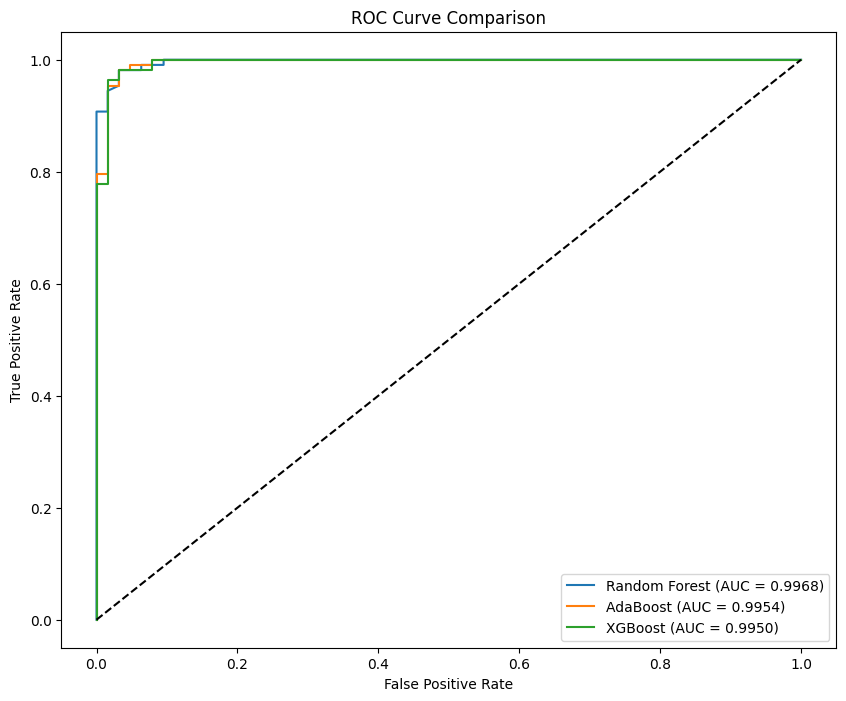

In [1]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
cancer_data = load_breast_cancer()
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.Series(cancer_data.target)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train models
rf_model = RandomForestClassifier(random_state=42)
adaboost_model = AdaBoostClassifier(random_state=42)
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

rf_model.fit(X_train, y_train)
adaboost_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

# Generate predictions and probabilities
rf_probs = rf_model.predict_proba(X_test)[:, 1]
adaboost_probs = adaboost_model.predict_proba(X_test)[:, 1]
xgboost_probs = xgboost_model.predict_proba(X_test)[:, 1]

rf_preds = rf_model.predict(X_test)
adaboost_preds = adaboost_model.predict(X_test)
xgboost_preds = xgboost_model.predict(X_test)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_preds)
adaboost_accuracy = accuracy_score(y_test, adaboost_preds)
xgboost_accuracy = accuracy_score(y_test, xgboost_preds)

rf_auc = roc_auc_score(y_test, rf_probs)
adaboost_auc = roc_auc_score(y_test, adaboost_probs)
xgboost_auc = roc_auc_score(y_test, xgboost_probs)

rf_cm = confusion_matrix(y_test, rf_preds)
adaboost_cm = confusion_matrix(y_test, adaboost_preds)
xgboost_cm = confusion_matrix(y_test, xgboost_preds)

# Generate ROC curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_probs)
xgboost_fpr, xgboost_tpr, _ = roc_curve(y_test, xgboost_probs)

# Plot and save ROC curve
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.4f})')
plt.plot(adaboost_fpr, adaboost_tpr, label=f'AdaBoost (AUC = {adaboost_auc:.4f})')
plt.plot(xgboost_fpr, xgboost_tpr, label=f'XGBoost (AUC = {xgboost_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.savefig('roc_curve.png', bbox_inches='tight')
plt.show()
